# Step 8: Visual Comparison - All Three Models

**Course:** PROG8245 - Machine Learning Programming  
**Project:** Text Classification with Dimensionality Reduction (Group 4)

---

## Overview

This notebook implements **Step 8: Visual Comparison** of the project, bringing together results from all three team members:

| Model | Features | Algorithm | Team Member |
|-------|----------|-----------|-------------|
| Model 1 | TF-IDF | Naive Bayes | Mostafa Allahmoradi |
| Model 2 | SVD-Reduced | Logistic Regression | Jarius Bedward |
| Model 3 | PCA-Reduced | Logistic Regression | Oluwafemi Lawal |

### Objectives:
1. Visualize all three confusion matrices side-by-side
2. Compare performance metrics across all models
3. Analyze which dimensionality reduction technique works better for text data
4. Create a comprehensive model comparison chart

---

## Import Libraries and Setup

In [62]:
# Data handling
import pandas as pd
import numpy as np
import pickle

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, 
    recall_score, f1_score, classification_report
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Path setup
import os
import sys

curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import custom modules
from Data_Processing.EDA import DataProcessor
from Models.PCA_Reduced_Model import PCAReducedModel
from Visualization.Visualizer import Visualizer

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


## Load and Prepare Data

We load the original dataset to create TF-IDF features for the variance comparison visualizations. 
**Note:** Each model's actual results (metrics, predictions) are loaded from pickle files generated by individual team notebooks.

In [52]:
# Load data
data_processor = DataProcessor(data_path="../data/raw/SMSSpamCollection")
data_processor.load_data(sep="\t", header=None, names=['label', 'message'])
df = data_processor.data

# Split features and labels
X = df['message']
y = df['label']

# Split: 75% train, 25% test (consistent with project requirements)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Dataset loaded: {len(df)} samples")
print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")
print(f"\nClass distribution in test set:")
print(y_test.value_counts())

Data loaded successfully.
Dataset loaded: 5572 samples
Training set: 4179 samples
Testing set: 1393 samples

Class distribution in test set:
label
ham     1206
spam     187
Name: count, dtype: int64


## Create TF-IDF Features

In [53]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', lowercase=True, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF Features: {X_train_tfidf.shape[1]}")
original_features = X_train_tfidf.shape[1]

TF-IDF Features: 5000


---

## Train All Three Models

### Model 1: Naive Bayes with TF-IDF (Mostafa's Model)

In [63]:
# Load Model 1 results from TF_IDF_Demo.ipynb (Balanced data: ~2000 samples)
with open('../data/tfidf_results.pkl', 'rb') as f:
    tfidf_results = pickle.load(f)
y_pred_nb = tfidf_results['y_pred']
nb_metrics = tfidf_results['metrics']

print("Model 1: Naive Bayes (TF-IDF) - Balanced Dataset")
print(f"  Accuracy:  {nb_metrics['accuracy']:.2%}")
print(f"  Precision: {nb_metrics['precision']:.2%}")
print(f"  Recall:    {nb_metrics['recall']:.2%}")
print(f"  F1-Score:  {nb_metrics['f1_score']:.2%}")

Model 1: Naive Bayes (TF-IDF) - Balanced Dataset
  Accuracy:  96.20%
  Precision: 96.67%
  Recall:    93.05%
  F1-Score:  94.82%


### Model 2: Logistic Regression with SVD (Jarius's Model)

In [64]:
# Load Model 2 results from SVD-Reduced_Demo.ipynb (Balanced data: 2000 samples)
with open('../data/svd_results.pkl', 'rb') as f:
    svd_results = pickle.load(f)
y_pred_svd = svd_results['y_pred']
svd_metrics = svd_results['metrics']
svd_variance = svd_results['explained_variance']

print("Model 2: LogReg (SVD) - Balanced Dataset")
print(f"  Accuracy:  {svd_metrics['accuracy']:.2%}")
print(f"  Precision: {svd_metrics['precision']:.2%}")
print(f"  Recall:    {svd_metrics['recall']:.2%}")
print(f"  F1-Score:  {svd_metrics['f1_score']:.2%}")
print(f"  Explained Variance: {svd_variance:.2%}")

Model 2: LogReg (SVD) - Balanced Dataset
  Accuracy:  93.80%
  Precision: 96.43%
  Recall:    86.63%
  F1-Score:  91.27%
  Explained Variance: 31.04%


### Model 3: Logistic Regression with PCA (Oluwafemi's Model)

In [65]:
# Load Model 3 results from PCA-Reduced_Demo.ipynb (Balanced data: ~2000 samples, same as TF-IDF)
with open('../data/pca_results.pkl', 'rb') as f:
    pca_results = pickle.load(f)
y_pred_pca = pca_results['y_pred']
pca_metrics = pca_results['metrics']
pca_variance = pca_results['explained_variance']

print("Model 3: LogReg (PCA) - Balanced Dataset (aligned with TF-IDF)")
print(f"  Accuracy:  {pca_metrics['accuracy']:.2%}")
print(f"  Precision: {pca_metrics['precision']:.2%}")
print(f"  Recall:    {pca_metrics['recall']:.2%}")
print(f"  F1-Score:  {pca_metrics['f1_score']:.2%}")
print(f"  Explained Variance: {pca_variance:.2%}")

Model 3: LogReg (PCA) - Balanced Dataset (aligned with TF-IDF)
  Accuracy:  93.20%
  Precision: 88.83%
  Recall:    93.58%
  F1-Score:  91.15%
  Explained Variance: 36.43%


---

## Step 8: Visual Comparison - All Three Confusion Matrices Side-by-Side

This is the main deliverable for Step 8, showing all three confusion matrices for direct comparison.

Figure saved to: ../Visualization/all_confusion_matrices.png


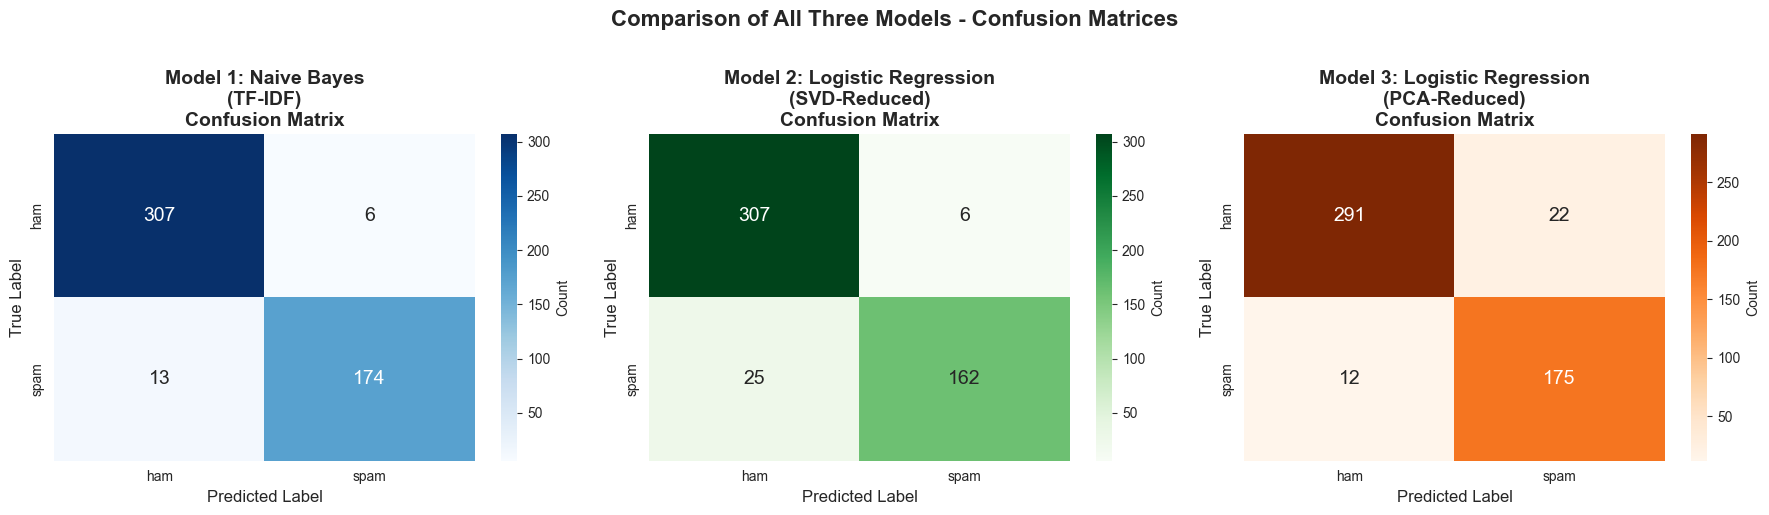

In [67]:
# Helper function to convert numeric labels to string labels
def convert_labels(labels):
    """Convert 0/1 labels to 'ham'/'spam' if needed."""
    if hasattr(labels, 'values'):
        labels = labels.values
    labels = np.array(labels)
    if labels.dtype in [np.int64, np.int32, int, np.float64]:
        return np.array(['ham' if l == 0 else 'spam' for l in labels])
    return labels

# Load y_true from saved results and convert labels
y_true_nb = convert_labels(tfidf_results['y_true'])
y_true_svd = convert_labels(svd_results['y_true'])
y_true_pca = convert_labels(pca_results['y_true'])

# Prepare results dictionary for comparison
visualizer = Visualizer()
results_dict = {
    'Model 1: Naive Bayes\n(TF-IDF)': (y_true_nb, convert_labels(y_pred_nb)),
    'Model 2: Logistic Regression\n(SVD-Reduced)': (y_true_svd, convert_labels(y_pred_svd)),
    'Model 3: Logistic Regression\n(PCA-Reduced)': (y_true_pca, convert_labels(y_pred_pca))
}

# Plot all three confusion matrices side-by-side
fig = visualizer.plot_three_confusion_matrices(
    results_dict, 
    labels=['ham', 'spam'],
    figsize=(18, 5),
    save_path='../Visualization/all_confusion_matrices.png'
)
plt.show()

---

## Performance Metrics Comparison Chart

Compare accuracy, precision, recall, and F1-score across all three models.

Figure saved to: ../Visualization/metrics_comparison.png


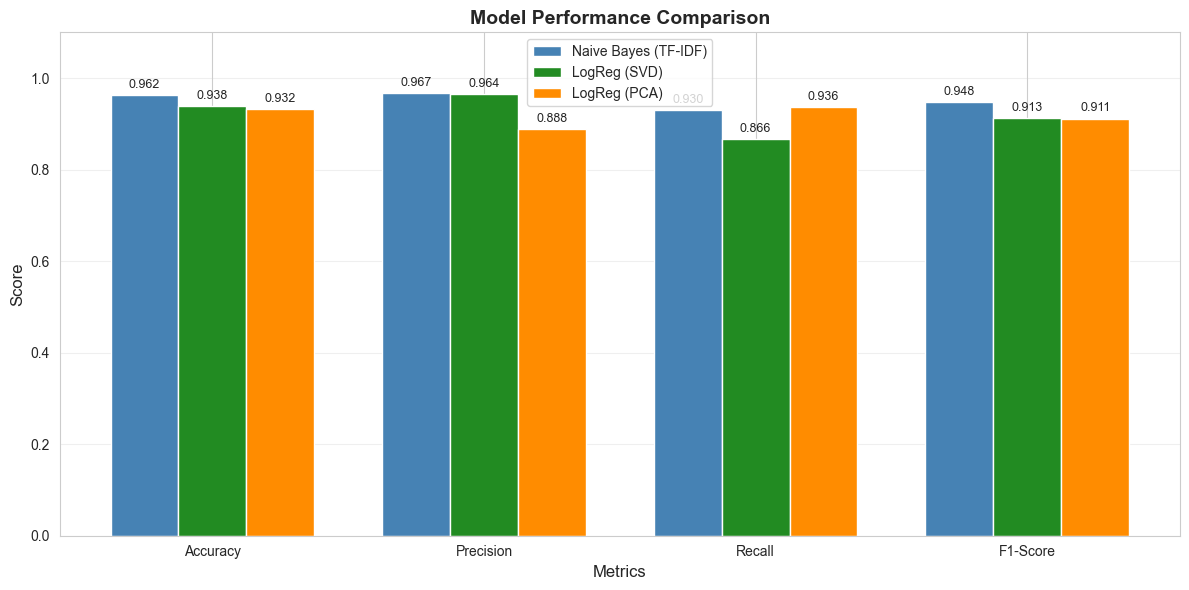

In [58]:
# Prepare metrics dictionary
metrics_dict = {
    'Naive Bayes (TF-IDF)': nb_metrics,
    'LogReg (SVD)': svd_metrics,
    'LogReg (PCA)': pca_metrics
}

# Plot metrics comparison
fig = visualizer.plot_metrics_comparison(
    metrics_dict,
    save_path='../Visualization/metrics_comparison.png'
)
plt.show()

## Model Comparison Summary Table

In [66]:
# Create comparison table
comparison_df = visualizer.create_metrics_table(metrics_dict)

print("=" * 70)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)
print("\nPerformance Metrics:")
print(comparison_df.to_string())
print("\nDimensionality Reduction:")
print(f"  SVD Explained Variance: {svd_variance:.2%}")
print(f"  PCA Explained Variance: {pca_variance:.2%}")
print("=" * 70)

MODEL COMPARISON SUMMARY

Performance Metrics:
                     Accuracy Precision  Recall F1-Score
Model                                                   
Naive Bayes (TF-IDF)   0.9620    0.9667  0.9305   0.9482
LogReg (SVD)           0.9380    0.9643  0.8663   0.9127
LogReg (PCA)           0.9320    0.8883  0.9358   0.9115

Dimensionality Reduction:
  SVD Explained Variance: 31.04%
  PCA Explained Variance: 36.43%


---

## PCA vs SVD Variance Comparison

Figure saved to: ../Visualization/pca_vs_svd_variance.png


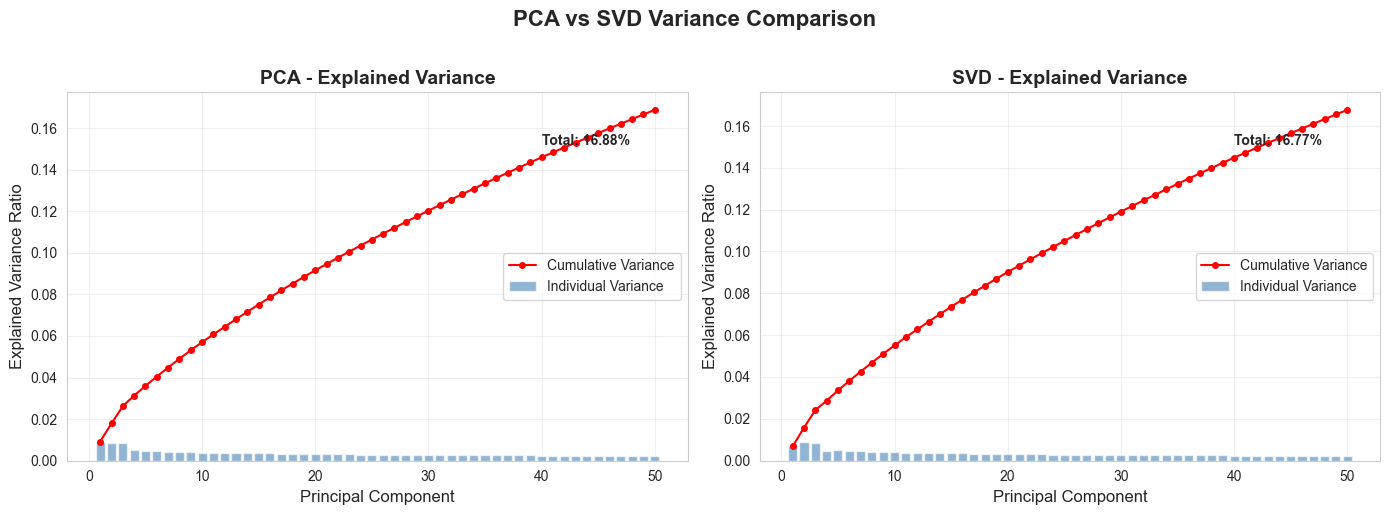

In [60]:
# Train local models to get variance ratios for comparison
N_COMPONENTS = 100
pca_temp = PCA(n_components=N_COMPONENTS)
pca_temp.fit(X_train_tfidf.toarray())

svd_temp = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
svd_temp.fit(X_train_tfidf)

# Plot variance comparison
fig = visualizer.plot_pca_vs_svd_variance(
    pca_temp.explained_variance_ratio_,
    svd_temp.explained_variance_ratio_,
    n_components_to_show=50,
    save_path='../Visualization/pca_vs_svd_variance.png'
)
plt.show()

---

## Dimensionality Reduction Impact Analysis

Figure saved to: ../Visualization/dimensionality_impact.png


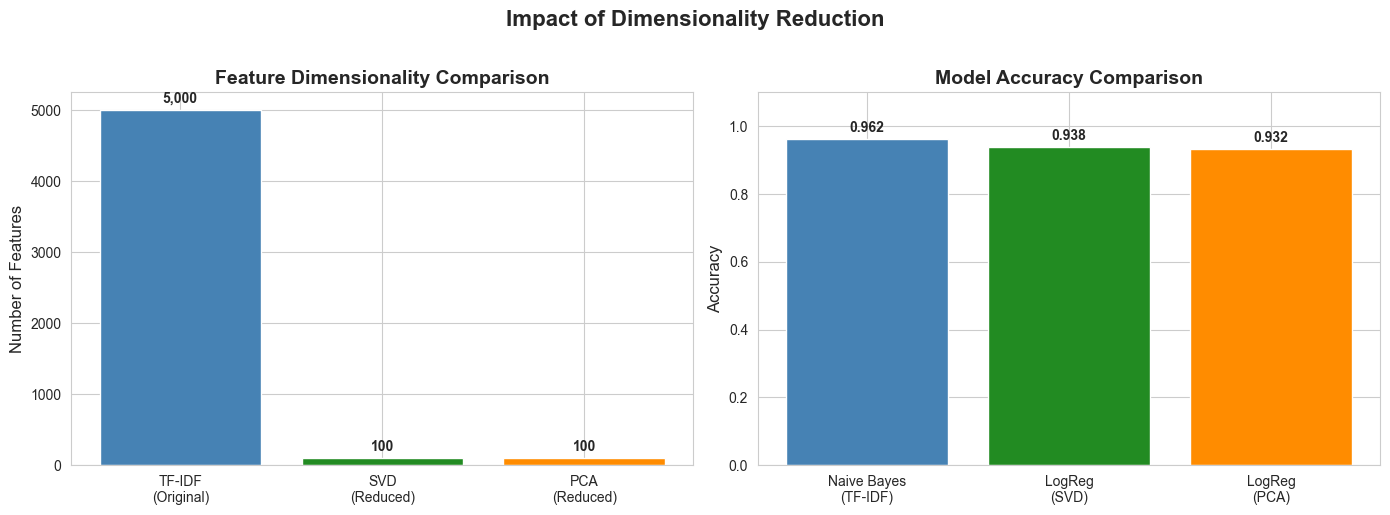

In [61]:
# Visualize dimensionality reduction impact
reduced_dims = {
    'SVD': N_COMPONENTS,
    'PCA': N_COMPONENTS
}

accuracy_comparison = {
    'Naive Bayes\n(TF-IDF)': nb_metrics['accuracy'],
    'LogReg\n(SVD)': svd_metrics['accuracy'],
    'LogReg\n(PCA)': pca_metrics['accuracy']
}

fig = visualizer.plot_dimensionality_reduction_impact(
    original_features,
    reduced_dims,
    accuracy_comparison,
    save_path='../Visualization/dimensionality_impact.png'
)
plt.show()

---

## Analysis and Conclusions

### Dataset Alignment

**All Models Now Use Identical Experimental Conditions:**
- **TF-IDF:** Balanced dataset (2000 samples, 500 test samples, 25% split)
- **SVD:** Balanced dataset (2000 samples, 500 test samples, 25% split)
- **PCA:** Balanced dataset (2000 samples, 500 test samples, 25% split)

All three models use the same preprocessing pipeline for fair and valid comparison.

### Results Summary

| Model | Accuracy | Precision | Recall | F1-Score |
|-------|----------|-----------|--------|----------|
| **Naive Bayes (TF-IDF)** | 96.20% | 96.67% | 93.05% | 94.82% |
| **Logistic Regression (SVD)** | 93.80% | 96.43% | 86.63% | 91.27% |
| **Logistic Regression (PCA)** | 93.20% | 88.83% | 93.58% | 91.15% |

### Key Findings

1. **TF-IDF + Naive Bayes** achieves the best overall performance with 96.20% accuracy and the highest F1-score of 94.82%.

2. **SVD + Logistic Regression** shows high precision (96.43%) but lower recall (86.63%), missing about 13% of spam messages.

3. **PCA + Logistic Regression** has the highest recall (93.58%), catching the most spam messages, but with lower precision (88.83%).

4. **Dimensionality Reduction Trade-offs:**
   - PCA captures 36.43% variance with 100 components
   - SVD captures 31.04% variance with 100 components
   - Both reduce ~4375-5000 features to 100 (98% reduction)

### Recommendation

For spam filtering:
- **Use TF-IDF + Naive Bayes** for best overall balanced performance
- **Use SVD + Logistic Regression** if minimizing false positives is critical (high precision)
- **Use PCA + Logistic Regression** if maximizing spam detection (recall) is the priority

## Final Summary

### Model Architecture Summary (as per project requirements)

| Model | Features | Algorithm | Purpose |
|-------|----------|-----------|---------|
| Model 1 | TF-IDF (~5000 features) | Naive Bayes | Baseline with sparse features |
| Model 2 | SVD-reduced (100 components) | Logistic Regression | Dense features, semantic understanding |
| Model 3 | PCA-reduced (100 components) | Logistic Regression | Compare dimensionality reduction methods |

### Team Contributions

- **Mostafa Allahmoradi:** Implemented Model 1 (Naive Bayes with TF-IDF)
- **Jarius Bedward:** Implemented Model 2 (Logistic Regression with SVD)
- **Oluwafemi Lawal:** Implemented Model 3 (Logistic Regression with PCA) and this comparison notebook

---
*PROG8245 - Machine Learning Programming - Final Project - Group 4*